In [1]:
import pandas as pd

## Importing Dataset

In [2]:
df_train = pd.read_csv(r'data/train.csv')
df_test = pd.read_csv(r'data/test.csv')
df_submissions = pd.read_csv(r'data/gender_submission.csv')

# Filling Missing Values ....

In [3]:
import numpy as np

# Filling Median Values as the dataset has been Previously Analyzed ...
age_median = np.median(df_train.loc[~df_train.Age.isna(), 'Age'])
df_train.Age = df_train[['Age']].fillna(age_median)
df_test.Age = df_test[['Age']].fillna(age_median)

In [4]:
# Filling values of Fare in the Test Data ...
fare_median = df_train.Fare.median()
df_test['Fare'] = df_test[['Fare']].fillna(fare_median)

## Encoding Data [Label as well as OnHotEncoding]

In [5]:
from sklearn.preprocessing import LabelEncoder

# OneHotEncoding the Pclass Column ...
df_train = pd.get_dummies(data=df_train, columns=['Pclass'], prefix='Pclass', dtype=int, drop_first=True)
df_test = pd.get_dummies(data=df_test, columns=['Pclass'], prefix='Pclass', dtype=int, drop_first=True)
df_train

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,0,1
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [6]:
# Label Encoding the Data .....
scaler_sex = LabelEncoder().fit(df_train.Sex)
df_train.Sex = scaler_sex.transform(df_train.Sex)
df_test.Sex = scaler_sex.transform(df_test.Sex)

## Applying Standard Scaler -  Not Compulsory in case of SVM

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
standardScaler = StandardScaler().fit(df_train[['Age', 'Fare']])
df_train[['Age', 'Fare']] = standardScaler.transform(df_train[['Age', 'Fare']])
df_test[['Age', 'Fare']] = standardScaler.transform(df_test[['Age', 'Fare']])

## Generating New Features

In [9]:
df_train['TravelAlone'] = np.where((df_train.Parch + df_train.SibSp) > 0, 1, 0)
df_test['TravelAlone'] = np.where((df_test.Parch + df_test.SibSp) > 0, 1, 0)

## Dropping Unnecessary Columns

In [10]:
df_train.drop(axis=1, columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], inplace=True)
df_test.drop(axis=1, columns=['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], inplace=True)

In [11]:
df_train.columns

Index(['PassengerId', 'Survived', 'Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3',
       'TravelAlone'],
      dtype='object')

## Starting Model Fitting

In [12]:
# Implementing Grid Search for finding the best model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [13]:
# Setting value of Parameters to test in ....
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 1000, 10000, 100000]
}

features = ['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'TravelAlone']

svm = SVC(kernel='linear')
grid = GridSearchCV(svm, param_grid, cv=StratifiedKFold(10))

In [14]:
# Fitting the Grid Created in order to get the best parameters
grid.fit(df_train[features], df_train['Survived'])

C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxS

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000, 100000]})

In [15]:
# Printing the Best Score and the Parameters Selected ...
grid.best_score_, grid.best_params_

(np.float64(0.7889762796504368), {'C': 100, 'max_iter': 10000})

## Making Prediction

In [16]:
df_train['predicted'] = grid.predict(df_train[features])
df_test['predicted'] = grid.predict(df_test[features])

## Analysis of the Accuracy in the Train Set

In [17]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

<Axes: >

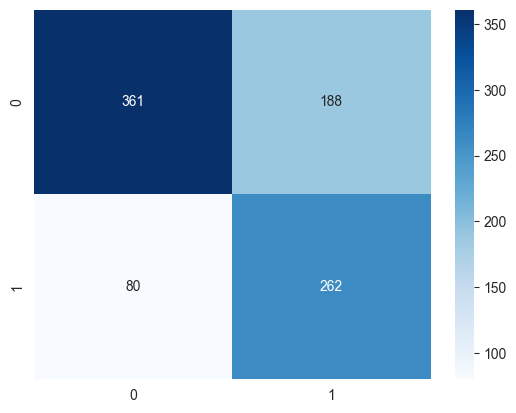

In [18]:
import seaborn as sns

cm = confusion_matrix(y_true=df_train['Survived'], y_pred=df_train['predicted'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [19]:
accuracy_score(y_true=df_train['Survived'], y_pred=df_train['predicted'])

0.6992143658810326

In [20]:
f1_score(y_true=df_train['Survived'], y_pred=df_train['predicted'])

np.float64(0.6616161616161617)

## Fitting not Linear Models

In [21]:
# Setting value of Parameters to test in ....
param_grid = {
    'kernel': ['poly', 'sigmoid', 'rbf'],
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [100, 1000, 10000]
}

features = ['Sex', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'TravelAlone']

svm = SVC()
grid = GridSearchCV(svm, param_grid=param_grid, cv=StratifiedKFold(10))

In [22]:
# Fitting the Grid Created in order to get the best parameters
grid.fit(df_train[features], df_train['Survived'])

C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sahil.lodha\PycharmProjects\datascience_notebooks\env\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxS

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'max_iter': [100, 1000, 10000]})

In [23]:
grid.best_score_, grid.best_estimator_

(np.float64(0.8215230961298376), SVC(C=10, kernel='poly', max_iter=10000))

<Axes: >

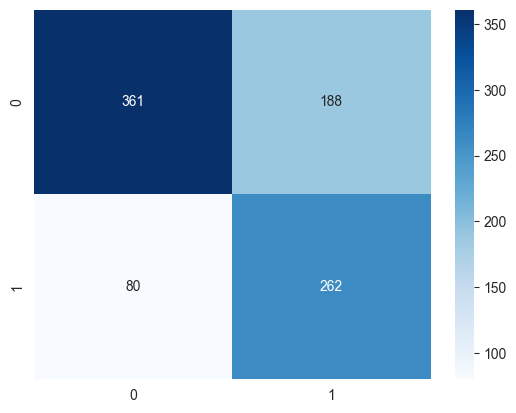

In [24]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true=df_train['Survived'], y_pred=df_train['predicted'])
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

In [25]:
accuracy_score(y_true=df_train['Survived'], y_pred=df_train['predicted']) , f1_score(y_true=df_train['Survived'], y_pred=df_train['predicted'])

(0.6992143658810326, np.float64(0.6616161616161617))